In [21]:
# Importing modules
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [22]:
# Load the data
df = pd.read_csv('AviationData.csv', encoding='cp1252')
df.head()

c:\Users\navil\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [23]:
# Check for duplicated rows
df.duplicated().sum()

0

In [24]:
# Check missing values
missing_series = df.isna().sum() / len(df)

# Sort
missing_series.sort_values(ascending=False, inplace=True)
missing_series

Schedule                  0.858453
Air.carrier               0.812710
FAR.Description           0.639742
Aircraft.Category         0.636772
Longitude                 0.613304
Latitude                  0.613203
Airport.Code              0.434699
Airport.Name              0.406113
Broad.phase.of.flight     0.305606
Publication.Date          0.154924
Total.Serious.Injuries    0.140737
Total.Minor.Injuries      0.134246
Total.Fatal.Injuries      0.128261
Engine.Type               0.079616
Report.Status             0.071786
Purpose.of.flight         0.069660
Number.of.Engines         0.068445
Total.Uninjured           0.066510
Weather.Condition         0.050535
Aircraft.damage           0.035932
Registration.Number       0.014816
Injury.Severity           0.011250
Country                   0.002542
Amateur.Built             0.001147
Model                     0.001035
Make                      0.000709
Location                  0.000585
Event.Date                0.000000
Accident.Number     

In [25]:
# Drop columns with many missing values that are not relevant
columns_to_drop = ['Schedule', 'Air.carrier', 'FAR.Description', 'Longitude', 'Latitude']

df.drop(columns_to_drop, axis=1, inplace=True)

In [26]:
df.isna().sum().sort_values(ascending=False) / len(df)

Aircraft.Category         0.636772
Airport.Code              0.434699
Airport.Name              0.406113
Broad.phase.of.flight     0.305606
Publication.Date          0.154924
Total.Serious.Injuries    0.140737
Total.Minor.Injuries      0.134246
Total.Fatal.Injuries      0.128261
Engine.Type               0.079616
Report.Status             0.071786
Purpose.of.flight         0.069660
Number.of.Engines         0.068445
Total.Uninjured           0.066510
Weather.Condition         0.050535
Aircraft.damage           0.035932
Registration.Number       0.014816
Injury.Severity           0.011250
Country                   0.002542
Amateur.Built             0.001147
Model                     0.001035
Make                      0.000709
Location                  0.000585
Event.Date                0.000000
Accident.Number           0.000000
Investigation.Type        0.000000
Event.Id                  0.000000
dtype: float64

In [27]:
# Inspect Aircraft.Category
df['Aircraft.Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Airport.Code            50249 non-null  object 
 7   Airport.Name            52790 non-null  object 
 8   Injury.Severity         87889 non-null  object 
 9   Aircraft.damage         85695 non-null  object 
 10  Aircraft.Category       32287 non-null  object 
 11  Registration.Number     87572 non-null  object 
 12  Make                    88826 non-null  object 
 13  Model                   88797 non-null  object 
 14  Amateur.Built           88787 non-null

In [29]:
# Drop rows missing model or make
df.dropna(subset=['Make', 'Model'], inplace=True)
df[['Make', 'Model']].isna().sum()

Make     0
Model    0
dtype: int64

In [30]:
# Check amateuer built column
df['Amateur.Built'].mode()

0    No
dtype: object

In [31]:
# fill the column with the mode
df['Amateur.Built'].fillna(df['Amateur.Built'].mode()[0], inplace=True)
df['Amateur.Built'].isna().sum()

0

In [32]:
# check the damage column
df['Aircraft.damage'].value_counts()

Substantial    64097
Destroyed      18597
Minor           2792
Unknown          119
Name: Aircraft.damage, dtype: int64

In [33]:
# Imputing with mean
df['Total.Fatal.Injuries'].fillna(np.floor(df['Total.Fatal.Injuries'].mean()), inplace=True)
df['Total.Minor.Injuries'].fillna(np.floor(df['Total.Minor.Injuries'].mean()), inplace=True)
df['Total.Serious.Injuries'].fillna(np.floor(df['Total.Serious.Injuries'].mean()), inplace=True)
df['Total.Uninjured'].fillna(np.floor(df['Total.Uninjured'].mean()), inplace=True)

In [34]:
# impute number of engines column with mean
df['Number.of.Engines'].fillna(np.floor(df['Number.of.Engines'].mean()), inplace=True)

In [35]:
# fill other missing values with 'missing'
df.fillna('missing', inplace=True)

In [36]:
# Confirm no missing values
df.isna().sum().sum()

0

In [ ]:
# inspect the severity column
df[['Injury.Severity', 'Total.Fatal.Injuries']] 

In [ ]:
# More cleaning in injury severity column - dont include no of fatal injuries
df['Injury.Severity'] = df['Injury.Severity'].map(
    lambda x: 'Fatal' if 'Fatal(' in x else x
)

In [ ]:
# Check available categories
df['Injury.Severity'].value_counts()

In [37]:
# Create Unique name field
df['Unique_name'] = df['Make'] + '_' + df['Model']

In [40]:
# Change to datetime dtype
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

In [41]:
# create new column for year
df['year'] = df['Event.Date'].map(lambda x: x.year)

In [49]:
# Group by investigation type to get count of accidents for each model
accidents_series = df[df['Investigation.Type'] == 'Accident'].groupby(
    ['Unique_name']
)['Investigation.Type'].count()

# create df for incident and accident count
accident_incident_df = df['Unique_name']
accident_incident_df

0                           Stinson_108-3
1                          Piper_PA24-180
2                             Cessna_172M
3                            Rockwell_112
4                              Cessna_501
                       ...               
88884                     PIPER_PA-28-151
88885                       BELLANCA_7ECA
88886    AMERICAN CHAMPION AIRCRAFT_8GCBC
88887                         CESSNA_210N
88888                     PIPER_PA-24-260
Name: Unique_name, Length: 88777, dtype: object

In [50]:
# Drop duplicates to ensure unique aircraft name
accident_incident_df.drop_duplicates(inplace=True)
accident_incident_df = accident_incident_df.reset_index()
accident_incident_df.duplicated().sum()

0

In [51]:
# Create accident_count column
accident_incident_df['accident_count'] = accident_incident_df['Unique_name']
accident_incident_df.drop('index', axis=1, inplace=True)

In [52]:
# Run above cells
# map the real accident count values to the column
accident_incident_df['accident_count'] = accident_incident_df['accident_count'].map(
    lambda x: accidents_series[x] if x in accidents_series.index else 0
)

accident_incident_df['accident_count']

0         83
1          4
2        663
3          5
4         19
        ... 
20131      1
20132      1
20133      1
20134      1
20135      1
Name: accident_count, Length: 20136, dtype: int64

In [53]:
# Group by investigation type to get count of incidents for each aircraft
incidents_series = df[df['Investigation.Type'] == 'Incident'].groupby(
    ['Unique_name']
)['Investigation.Type'].count()
incidents_series.head()

Unique_name
2007 Savage Air LLC_EPIC LT    1
737_800                        2
777_FF2                        1
AEROSPATIALE_AS 350 B-2        1
AEROSPATIALE_AS350BA           1
Name: Investigation.Type, dtype: int64

In [54]:
# Run above cells
# Add column for incident count - the number of incidents per aircraft
accident_incident_df['incident_count'] = accident_incident_df['Unique_name']
accident_incident_df['incident_count'] = accident_incident_df['incident_count'].map(
    lambda x: incidents_series[x] if x in incidents_series.index else 0,
)

In [58]:
# Create new column for total accidents and incidents
accident_incident_df['total_accidents_incidents'] = (
    accident_incident_df['accident_count'] + accident_incident_df['incident_count']
)
accident_incident_df.sort_values('total_accidents_incidents', ascending=False, inplace=True)
accident_incident_df.head()

,Unique_name,accident_count,incident_count,total_accidents_incidents
19,Cessna_152,2155,13,2168
17,Cessna_172,1250,4,1254
51,Cessna_172N,993,3,996
49,Piper_PA-28-140,809,3,812
87,Cessna_150,711,5,716


Text(0.5, 1.0, 'Top 5o Riskiest Aircrafts')

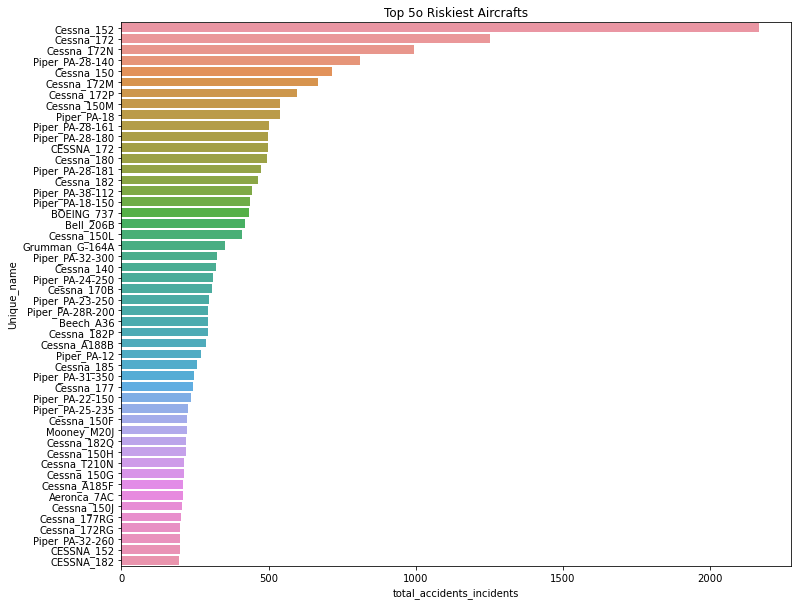

In [68]:
# plot top riskiest aircrafts
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(data=accident_incident_df.head(50),
            y='Unique_name',
            x='total_accidents_incidents',
            orient='h',
            ax=ax)
plt.title('Top 5o Riskiest Aircrafts')


In [125]:
# Get aircrafts with lowest incidents and no accidents
lowest_accidents_incidents = accident_incident_df[
    (accident_incident_df['accident_count'] == 0) &
    (
        accident_incident_df['total_accidents_incidents'] ==
        accident_incident_df['total_accidents_incidents'].min()
    )
]

lowest_accidents_incidents.set_index('Unique_name', inplace=True)
lowest_accidents_incidents.head()

,accident_count,incident_count,total_accidents_incidents
Unique_name,,,
Boeing_B747-436,0,1,1
Boeing_727-277,0,1,1
SHORT BROS. & HARLAND_SHORTS SC7 SKYVAN,0,1,1
EUROCOPTER DEUTSCHLAND GMBH_MBB-BK 117 C-1,0,1,1
BOEING_747-209B,0,1,1


,Injury.Severity,Total.Fatal.Injuries
0,Fatal(2),2.0
1,Fatal(4),4.0
2,Fatal(3),3.0
3,Fatal(2),2.0
4,Fatal(1),1.0
...,...,...
88884,Minor,0.0
88885,missing,0.0
88886,Non-Fatal,0.0
88887,missing,0.0


In [93]:
# What does unavailable mean
df[df['Injury.Severity'] == 'Unavailable'].head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Unique_name,year
11247,20001214X36228,Accident,LAX85LA191,1985-04-02,"EAGLE MOUNTAIN, CA",United States,missing,EAGLE MOUNTAIN,Unavailable,Substantial,...,0.0,0.0,0.0,0.0,VMC,Landing,Probable Cause,missing,Cessna_414,1985
19342,20001213X32755,Accident,MIA88WA086,1987-12-16,"BOGOTA, COLOMBIA",Colombia,missing,missing,Unavailable,Substantial,...,0.0,0.0,0.0,5.0,UNK,missing,Foreign,06-02-1995,Boeing_747-124F,1987
20344,20001213X25766,Accident,MIA88RA173,1988-05-21,"KINGSTON, Jamaica",Jamaica,missing,missing,Unavailable,Destroyed,...,0.0,0.0,0.0,5.0,VMC,missing,Foreign,06-02-1995,Bell_222UT,1988
21818,20001213X27314,Accident,MIA89RA122,1988-11-03,"SVARSTAD, Norway",Norway,missing,missing,Unavailable,Destroyed,...,0.0,0.0,0.0,5.0,VMC,missing,Foreign,06-02-1995,Schweizer_269C,1988
22734,20001213X28159,Accident,MIA89RA134,1989-04-12,"SANTO DOMINGO, Dominican Republic",Dominican Republic,missing,missing,Unavailable,Destroyed,...,0.0,0.0,0.0,5.0,VMC,missing,Foreign,06-02-1995,Beech_A80,1989


In [122]:
# Group by severity and count
# also transpose to make catogories as columns
severity_count_df = df.groupby(['Injury.Severity', 'Unique_name']).size().unstack(fill_value=0).T

# remove columns name
severity_count_df.columns.name = ""

severity_count_df.head()

,Fatal,Incident,Minor,Non-Fatal,Serious,Unavailable,missing
Unique_name,,,,,,,
107.5 Flying Corporation_One Design DR 107,1,0,0,0,0,0,0
1200_G103,0,0,0,1,0,0,0
177MF LLC_PITTS MODEL 12,0,0,0,1,0,0,0
1977 Colfer-chan_STEEN SKYBOLT,0,0,0,1,0,0,0
1st Ftr Gp_FOCKE-WULF 190,1,0,0,0,0,0,0


In [124]:
severity_count_df[severity_count_df['Unavailable'] != 0].sort_values(by='Unavailable', ascending=False)

,Fatal,Incident,Minor,Non-Fatal,Serious,Unavailable,missing
Unique_name,,,,,,,
Boeing_737-200,11,18,0,19,0,5,0
Mcdonnell Douglas_MD-11,2,17,0,17,0,3,0
Boeing_747-400,1,6,0,13,0,3,1
Sikorsky_S-76B,2,0,0,3,0,2,0
Schweizer_269C,12,0,0,92,0,2,0
...,...,...,...,...,...,...,...
Boeing_727-100,0,8,0,3,0,1,0
Boeing_707-355C,0,1,0,0,0,1,0
Boeing_234,1,0,0,0,0,1,0


In [146]:
# Check no injuries
injury_columns = ['Fatal', 'Incident', 'Minor', 'Non-Fatal', 'Serious']
no_injuries_df = severity_count_df[(severity_count_df[injury_columns] == 0).sum(axis=1) == len(injury_columns)]

In [149]:
# filter to check if the injuries column is missing or there were no injuries
no_injuries_df[no_injuries_df['missing'] == 0]

,Fatal,Incident,Minor,Non-Fatal,Serious,Unavailable,missing
Unique_name,,,,,,,
Agusta_A-109E,0,0,0,0,0,1,0
Airbus Industrie_A300B4-62R,0,0,0,0,0,1,0
Airbus Industrie_A320-212,0,0,0,0,0,1,0
Airbus_A310,0,0,0,0,0,1,0
Beech_A80,0,0,0,0,0,1,0
Beech_BE-1900C,0,0,0,0,0,1,0
Bell_222-UT,0,0,0,0,0,1,0
Boeing_737-228,0,0,0,0,0,1,0
Boeing_737-236,0,0,0,0,0,1,0
